Episode 1: Reward = 100.0
Episode 2: Reward = 0.0
Episode 3: Reward = 100.0
Episode 4: Reward = 100.0
Episode 5: Reward = -100.0
Episode 6: Reward = 100.0
Episode 7: Reward = 100.0
Episode 8: Reward = 100.0
Episode 9: Reward = 0.0
Episode 10: Reward = 100.0
Episode 11: Reward = 100.0
Episode 12: Reward = 100.0
Episode 13: Reward = 100.0
Episode 14: Reward = 100.0
Episode 15: Reward = 100.0
Episode 16: Reward = 100.0
Episode 17: Reward = 100.0
Episode 18: Reward = 100.0
Episode 19: Reward = 100.0
Episode 20: Reward = 100.0
Episode 21: Reward = 100.0
Episode 22: Reward = 100.0
Episode 23: Reward = 100.0
Episode 24: Reward = 100.0
Episode 25: Reward = 100.0
Episode 26: Reward = 100.0
Episode 27: Reward = 100.0
Episode 28: Reward = 100.0
Episode 29: Reward = 100.0
Episode 30: Reward = 100.0
Episode 31: Reward = 100.0
Episode 32: Reward = 100.0
Episode 33: Reward = 100.0
Episode 34: Reward = 100.0
Episode 35: Reward = 100.0
Episode 36: Reward = 100.0
Episode 37: Reward = 100.0
Episode 38: R

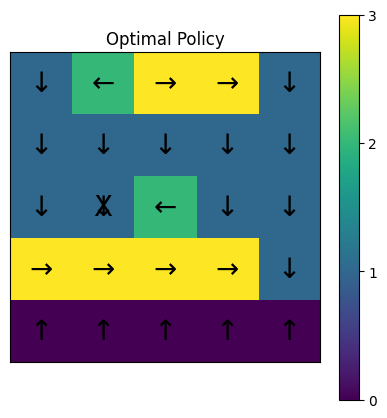

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# グリッドワールドの設定
grid_size = 5
num_actions = 4
num_episodes = 1000
max_steps = 100
learning_rate = 0.1
discount_factor = 0.99

# 行動の定義
actions = [(-1, 0), (1, 0), (0, -1), (0, 1)]  # 上、下、左、右

# 報酬の設定
rewards = np.zeros((grid_size, grid_size))
rewards[0, 0] = 0
# 落とし穴を設定
rewards[1, grid_size//2] = -100
rewards[grid_size - 1, grid_size - 1] = 100

# Actor-Criticのパラメータ
actor_weights = np.zeros((grid_size, grid_size, num_actions))
critic_weights = np.zeros((grid_size, grid_size))

# 方策とクリティックの更新
def update_weights(state, action, td_error):
    actor_weights[state[0], state[1], action] += learning_rate * td_error
    critic_weights[state[0], state[1]] += learning_rate * td_error

# 行動の選択
def choose_action(state, epsilon=0.1):
    if np.random.random() < epsilon:
        return np.random.choice(num_actions)
    action_probs = np.exp(actor_weights[state[0], state[1]])
    action_probs /= np.sum(action_probs)
    return np.random.choice(num_actions, p=action_probs)

# エピソードの実行
for episode in range(num_episodes):
    state = (0, 0)  # 初期状態
    episode_reward = 0

    for step in range(max_steps):
        action = choose_action(state)
        next_state = tuple(np.array(state) + np.array(actions[action]))
        next_state = np.clip(next_state, 0, grid_size - 1)

        reward = rewards[next_state[0], next_state[1]]
        episode_reward += reward

        # TD誤差の計算
        td_target = reward + discount_factor * critic_weights[next_state[0], next_state[1]]
        td_error = td_target - critic_weights[state[0], state[1]]

        # 重みの更新
        update_weights(state, action, td_error)

        state = tuple(next_state)  # 状態をタプルに変換

        if state == (grid_size - 1, grid_size - 1):
            break

    print(f"Episode {episode + 1}: Reward = {episode_reward}")

# 最適方策の可視化
optimal_policy = np.argmax(actor_weights, axis=2)

print("actor_weights : ", actor_weights)
print("critic_weights : ", critic_weights)

plt.figure(figsize=(5, 5))
plt.imshow(optimal_policy, cmap='viridis', interpolation='none')
for i in range(grid_size):
    for j in range(grid_size):
        arrow = '\u2191\u2193\u2190\u2192'[optimal_policy[i, j]]
        plt.text(j, i, arrow, ha='center', va='center', fontsize=20)
        if i ==grid_size//2 and j == 1:
            plt.text(j, i, 'X', ha='center', va='center', fontsize=20)
plt.colorbar(ticks=[0, 1, 2, 3], orientation='vertical')
plt.xticks([])
plt.yticks([])
plt.title('Optimal Policy')
plt.show()

In [20]:
actor_weights

array([[[-1.83525199e+00,  1.90808046e+02, -2.09299782e+00,
         -9.47631859e+01],
        [ 2.68983138e-02, -1.10954229e+00,  8.27486854e+01,
         -2.97670254e+00],
        [ 0.00000000e+00, -1.00980100e+01,  1.32972414e+00,
          3.65533943e+00],
        [ 0.00000000e+00, -7.05411979e-01, -1.41435965e+00,
          4.48960604e-01],
        [ 1.29570382e-04, -2.21715560e-01,  0.00000000e+00,
          0.00000000e+00]],

       [[-1.05202645e+01,  2.25303531e+02, -1.67594194e+00,
         -1.19923921e+02],
        [ 3.41313763e+00, -1.40904831e-01,  9.97956588e+01,
         -2.71320904e+01],
        [-9.00702990e-01,  0.00000000e+00, -1.71083673e+00,
         -2.52663528e-01],
        [ 9.51911556e-01,  2.35929694e+00, -1.01684616e+01,
          7.29828415e-01],
        [ 0.00000000e+00,  1.06845878e+00, -1.67234707e+00,
          1.91735543e-03]],

       [[-1.42077464e+01,  1.95933831e+02, -2.07602999e+00,
         -8.54595557e+01],
        [-2.31836266e+00,  7.55412736e-